# GRAVITATIONAL WAVE

In [1]:
#Importing libraries.
import pandas as pd
import matplotlib.pyplot as plt

Data information:
Gravitational wave strain for GW150914_R1 for L1,
This file has 4096 samples per second,
Starting GPS 1126259447 duration 32.

In [2]:
data = pd.read_csv('L-L1_GWOSC_4KHZ_R1-1126259447-32.txt') #Reading data.
data #Displaying data.

,Readings
0,-1.004326e-18
1,-9.581150e-19
2,-9.030594e-19
3,-8.800127e-19
4,-8.962525e-19
...,...
131067,-1.008207e-18
131068,-1.059122e-18
131069,-1.108628e-18
131070,-1.133498e-18


Converting exponantial value to float and for that we are using lambda function.

In [3]:
f= lambda x:x*10**18 #Lambda function.
data['Readings']=data['Readings'].apply(f) #Applying to values.
data #Displaying data.

,Readings
0,-1.004326
1,-0.958115
2,-0.903059
3,-0.880013
4,-0.896252
...,...
131067,-1.008207
131068,-1.059122
131069,-1.108628
131070,-1.133498


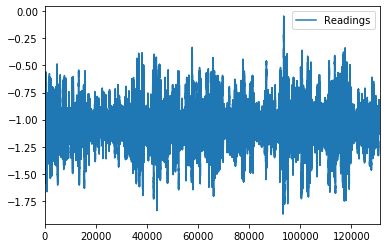

In [4]:
data.plot.line() #Ploting a line graph.
plt.savefig('line_graph.jpg') #Exporting graph as jpg image.

In [5]:
#Importing more libraries for autocorrelation.
from pandas.plotting import autocorrelation_plot

In [6]:
data.head() #Displaying top 5 rows for the dataframe

,Readings
0,-1.004326
1,-0.958115
2,-0.903059
3,-0.880013
4,-0.896252


Autocorrelation Plot: Autocorrelation plots are a commonly-used tool for checking randomness in a data set. This randomness is ascertained by computing autocorrelations for data values at varying time lags. If random, such autocorrelations should be near zero for any and all time-lag separations. If non-random, then one or more of the autocorrelations will be significantly non-zero.

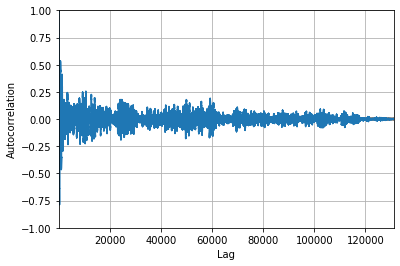

<Figure size 432x288 with 0 Axes>

In [7]:
autocorrelation_plot(data) #Correlation plot.
plt.show() #Displaying plot.
plt.savefig('correlation_plot.jpg') #Exporting graph as jpg image.

In [8]:
data_diff=data.diff(periods=1) #Proving that data is stationary by finding difference.
data_diff.head() #Printing top 5 rows of the dataframe.

,Readings
0,NaN
1,0.046211
2,0.055056
3,0.023047
4,-0.016240


In [9]:
data_diff=data_diff[1:] #Removing top 2 rows.
data_diff #Printing the dataframe.

,Readings
1,0.046211
2,0.055056
3,0.023047
4,-0.016240
5,-0.042188
...,...
131067,-0.007210
131068,-0.050915
131069,-0.049506
131070,-0.024870


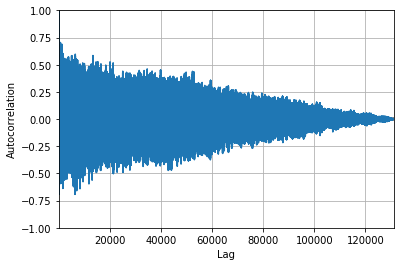

In [10]:
autocorrelation_plot(data_diff) #Autocorrelation plot function.
plt.show() #Plotting the graph.

In [11]:
#Splitting data into test and train to train the model for predictions.
x= data.values
train = x[0:100000]
test = x[100000:]   
prediction = [] #Predicting values array.

In [12]:
x.size #Total values in x.

131072

Auto Regressive Model: A regression model, such as linear regression, models an output value based on a linear combination of input values. 

(yhat = b0 + b1*X1), Where 
yhat is the prediction, 
b0 and b1 are coefficients found by optimizing the model on training data, and 
X is an input value. 

This technique can be used on time series where input variables are taken as observations at previous time steps, called lag variables.

In [13]:
#Importing libraries.
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
#Model training.
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [14]:
predictions= model_ar_fit.predict(start=100000,end=131072)

In [15]:
test #Test values.

array([[-0.83966616],
       [-0.78603849],
       [-0.7891603 ],
       ...,
       [-1.10862808],
       [-1.13349772],
       [-1.12487097]])

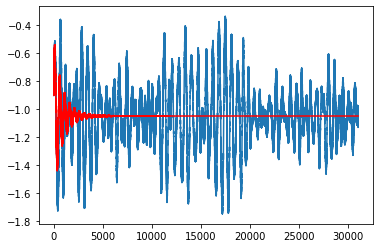

In [16]:
plt.plot(test) #Plotting test values.
plt.plot(predictions,color="red") #Plotting prediction values.

ARIMA, short for ‘Auto Regressive Integrated Moving Average’ is actually a class of models that ‘explains’ a given time series based on its own past values, that is, its own lags and the lagged forecast errors, so that equation can be used to forecast future values.

Any ‘non-seasonal’ time series that exhibits patterns and is not a random white noise can be modeled with ARIMA models.
An ARIMA model is characterized by 3 terms: p, d, q

where,
p is the order of the AR term
q is the order of the MA term
d is the number of differencing required to make the time series stationary

If a time series, has seasonal patterns, then you need to add seasonal terms and it becomes SARIMA, short for ‘Seasonal ARIMA’. More on that once we finish ARIMA.

In [17]:
#Importing libraries for ARIMA model
from statsmodels.tsa.arima_model import ARIMA

In [18]:
model_arima = ARIMA(train,order=(0,0,0))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

-14270.164938369577


In [19]:
predictions = model_arima_fit.forecast(steps=26251)[0] #Forecasting the values(value prediction).
predictions #Printing values.

array([-1.0525248, -1.0525248, -1.0525248, ..., -1.0525248, -1.0525248,
       -1.0525248])

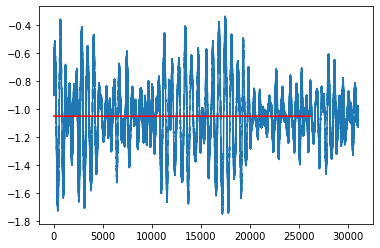

In [20]:
plt.plot(test) #Plotting test values.
plt.plot(predictions, color="red") #Plotting prediction values.